In [236]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
path = "/Users/noa/Desktop/Business Analytics/"
Stroke = pd.read_csv(path +"healthcare-dataset-stroke-data.csv")

In [237]:
# Stroke.head(50)
print(Stroke['gender'].value_counts())
print(Stroke['work_type'].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


In [238]:
# Stroke.info()

In [239]:
Cor = Stroke.corr() # High correlation regarding bmi and age (may interfere with regression-models)
Cor.style.background_gradient(cmap='coolwarm')

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [240]:
Stroke = Stroke.drop("id", axis = 1)
Stroke = pd.get_dummies(Stroke, drop_first = True)
Stroke.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,NaN,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


In [241]:
Stroke_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender_Male', 'gender_Other', 'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private','work_type_Self-employed', 'work_type_children' ,'Residence_type_Urban','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes']
len(Stroke_columns)

16

In [242]:
y = Stroke["stroke"]
X = Stroke.drop("stroke", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [248]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputer.fit(X_train)
X_train_imputed = imputer.transform(X_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=Stroke_columns, index = X_train.index)
X_train_imputed

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4313,57.00,0.0,0.0,134.76,29.1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
376,0.88,0.0,0.0,88.11,15.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4913,20.00,0.0,0.0,84.49,20.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1791,13.00,0.0,0.0,137.45,18.2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2166,28.00,0.0,0.0,169.49,27.2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,46.00,0.0,0.0,137.77,29.3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2763,45.00,0.0,0.0,63.73,32.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
905,31.00,0.0,0.0,76.26,35.6,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3980,45.00,0.0,0.0,218.10,55.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [249]:
X_test_imputed = imputer.transform(X_test)
X_test_imputed = pd.DataFrame(X_test_imputed, columns = Stroke_columns, index=X_test.index)
X_test_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1533 entries, 4673 to 3810
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             1533 non-null   float64
 1   hypertension                    1533 non-null   float64
 2   heart_disease                   1533 non-null   float64
 3   avg_glucose_level               1533 non-null   float64
 4   bmi                             1533 non-null   float64
 5   gender_Male                     1533 non-null   float64
 6   gender_Other                    1533 non-null   float64
 7   ever_married_Yes                1533 non-null   float64
 8   work_type_Never_worked          1533 non-null   float64
 9   work_type_Private               1533 non-null   float64
 10  work_type_Self-employed         1533 non-null   float64
 11  work_type_children              1533 non-null   float64
 12  Residence_type_Urban           

In [250]:
def calculate_lift(y_val, y_pred):
    from pandas import DataFrame
    from numpy import ceil, arange
    
    #Define an auxiliar dataframe to plot the curve
    aux_lift = DataFrame()
    aux_lift['true'] = y_val
    aux_lift['predicted'] = y_pred
    aux_lift.sort_values('predicted', ascending=False, inplace=True)
    
    #Create the values that will go into the X axis of our plot
    xval = arange(0.01,1.01,0.01) #create sequnence of values from 0.01 to 1.00 in steps of 0.01
    lift = [] #create empty list for storing lift values
    
    #Calculate the total ratio of true events in the data
    ratio_true_events_total = aux_lift['true'].sum() / len(aux_lift)
    
    #Calculate lift for each x value its correspondent y value
    for x in xval:
        index_xval = int(ceil(x*len(aux_lift))) #get index at specific value of x
        dataframe_xval = aux_lift.iloc[:index_xval,:]   #subset dataframe from 0 to index_val
        lift_xval = dataframe_xval['true'].sum()/len(dataframe_xval) #calculate lift for subset
        lift.append(lift_xval / ratio_true_events_total) #store results
    
    return (DataFrame({"Lift":lift, "ProportionSample":xval}))

In [247]:
print(y_test.shape)
print(y_train.shape)
print(X_test_imputed.shape)
print(X_train_imputed.shape)
X_train_imputed.head()

(1533,)
(3577,)
(1533, 16)
(3577, 16)


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4313,57.00,0.0,0.0,134.76,29.1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
376,0.88,0.0,0.0,88.11,15.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4913,20.00,0.0,0.0,84.49,20.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1791,13.00,0.0,0.0,137.45,18.2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2166,28.00,0.0,0.0,169.49,27.2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [204]:
# Just the default-model from the one below
Tree = DecisionTreeClassifier()
Tree.fit(X_train_imputed, y_train)
classification_report_DecisionTree = classification_report(y_test, Tree.predict(X_test_imputed))
AUC_DecisionTree = roc_auc_score(y_test, Tree.predict_proba(X_test_imputed)[:,1])

y_preds_proba = Tree.predict_proba(X_test_imputed)
lift_Tree = calculate_lift(y_test, y_preds_proba[:,1])
# classification_report_DecisionTree

In [205]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters = {"criterion":["gini","entropy"],
              "max_depth":[3, 5, 7, 10, 20, 30, 40, 60, 70], 
              "min_samples_split":[2,3,4,5,30,40, 50, 60]}

Tree_CV = GridSearchCV(DecisionTreeClassifier(random_state=3),parameters, cv=5)
Tree_CV.fit(X_train_imputed, y_train)

classification_report_DecisionTree_CV = classification_report(y_test, Tree_CV.predict(X_test_imputed))
AUC_DecisionTree_CV = roc_auc_score(y_test, Tree_CV.predict_proba(X_test_imputed)[:,1])

y_preds_proba = Tree_CV.predict_proba(X_test_imputed)
lift_Tree_CV = calculate_lift(y_test, y_preds_proba[:,1])

# print(tree_CV.best_params_) # We might have to change something here as the model preferes to predict almost everything as 0
# print(classification_report(y_test, tree_CV.predict(X_test_imputed)))

In [206]:
from sklearn.ensemble import RandomForestClassifier

parameters = {"criterion":["gini","entropy"],
              "max_depth":[3, 5, 7, 10, 20, 30, 40, 60, 70], 
              "min_samples_split":[2,3,4,5,30,40, 50, 60]}

Forest_CV = GridSearchCV(RandomForestClassifier(random_state=3),parameters, cv=5)
Forest_CV.fit(X_train_imputed, y_train)

classification_report_Forest_CV = classification_report(y_test, Forest_CV.predict(X_test_imputed))
AUC_Forest_CV = roc_auc_score(y_test, Forest_CV.predict_proba(X_test_imputed)[:,1])

y_preds_proba = Forest_CV.predict_proba(X_test_imputed)
lift_Forest_CV = calculate_lift(y_test, y_preds_proba[:,1])
# Model predicts everything as 0 again

In [207]:
# print(classification_report_ForestCV)

In [208]:
import sys
!{sys.executable} -m pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
parameters = {"n_estimators":[300, 400], 
               "subsample" : [0.5, 0.6, 0.7, 0.8],
              "learning_rate":[0.2]} # We can try more but my laptop is already struggling )-;

Boost_CV = GridSearchCV(XGBClassifier(random_state=3),parameters, cv=5)
Boost_CV.fit(X_train_imputed, y_train)

classification_report_Boost_CV = classification_report(y_test, Boost_CV.predict(X_test_imputed))
AUC_Boost_CV = roc_auc_score(y_test, Boost_CV.predict_proba(X_test_imputed)[:,1])

y_preds_proba = Boost_CV.predict_proba(X_test_imputed)
lift_Boost_CV = calculate_lift(y_test, y_preds_proba[:,1])

In [209]:
print('DecisionTree')
print(classification_report_DecisionTree)
print(AUC_DecisionTree)

print('\nDecisionTreeCV')
print(classification_report_DecisionTree_CV)
print(AUC_DecisionTree_CV)

print('\nForestCV')
print(classification_report_Forest_CV)
print(AUC_Forest_CV)

print('\nBoostCV')
print(classification_report_Boost_CV)
print(AUC_Boost_CV)

DecisionTree
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1450
           1       0.19      0.19      0.19        83

    accuracy                           0.91      1533
   macro avg       0.57      0.57      0.57      1533
weighted avg       0.91      0.91      0.91      1533

0.572247611134192

DecisionTreeCV
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.25      0.01      0.02        83

    accuracy                           0.94      1533
   macro avg       0.60      0.50      0.50      1533
weighted avg       0.91      0.94      0.92      1533

0.8334856668051516

ForestCV
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      153

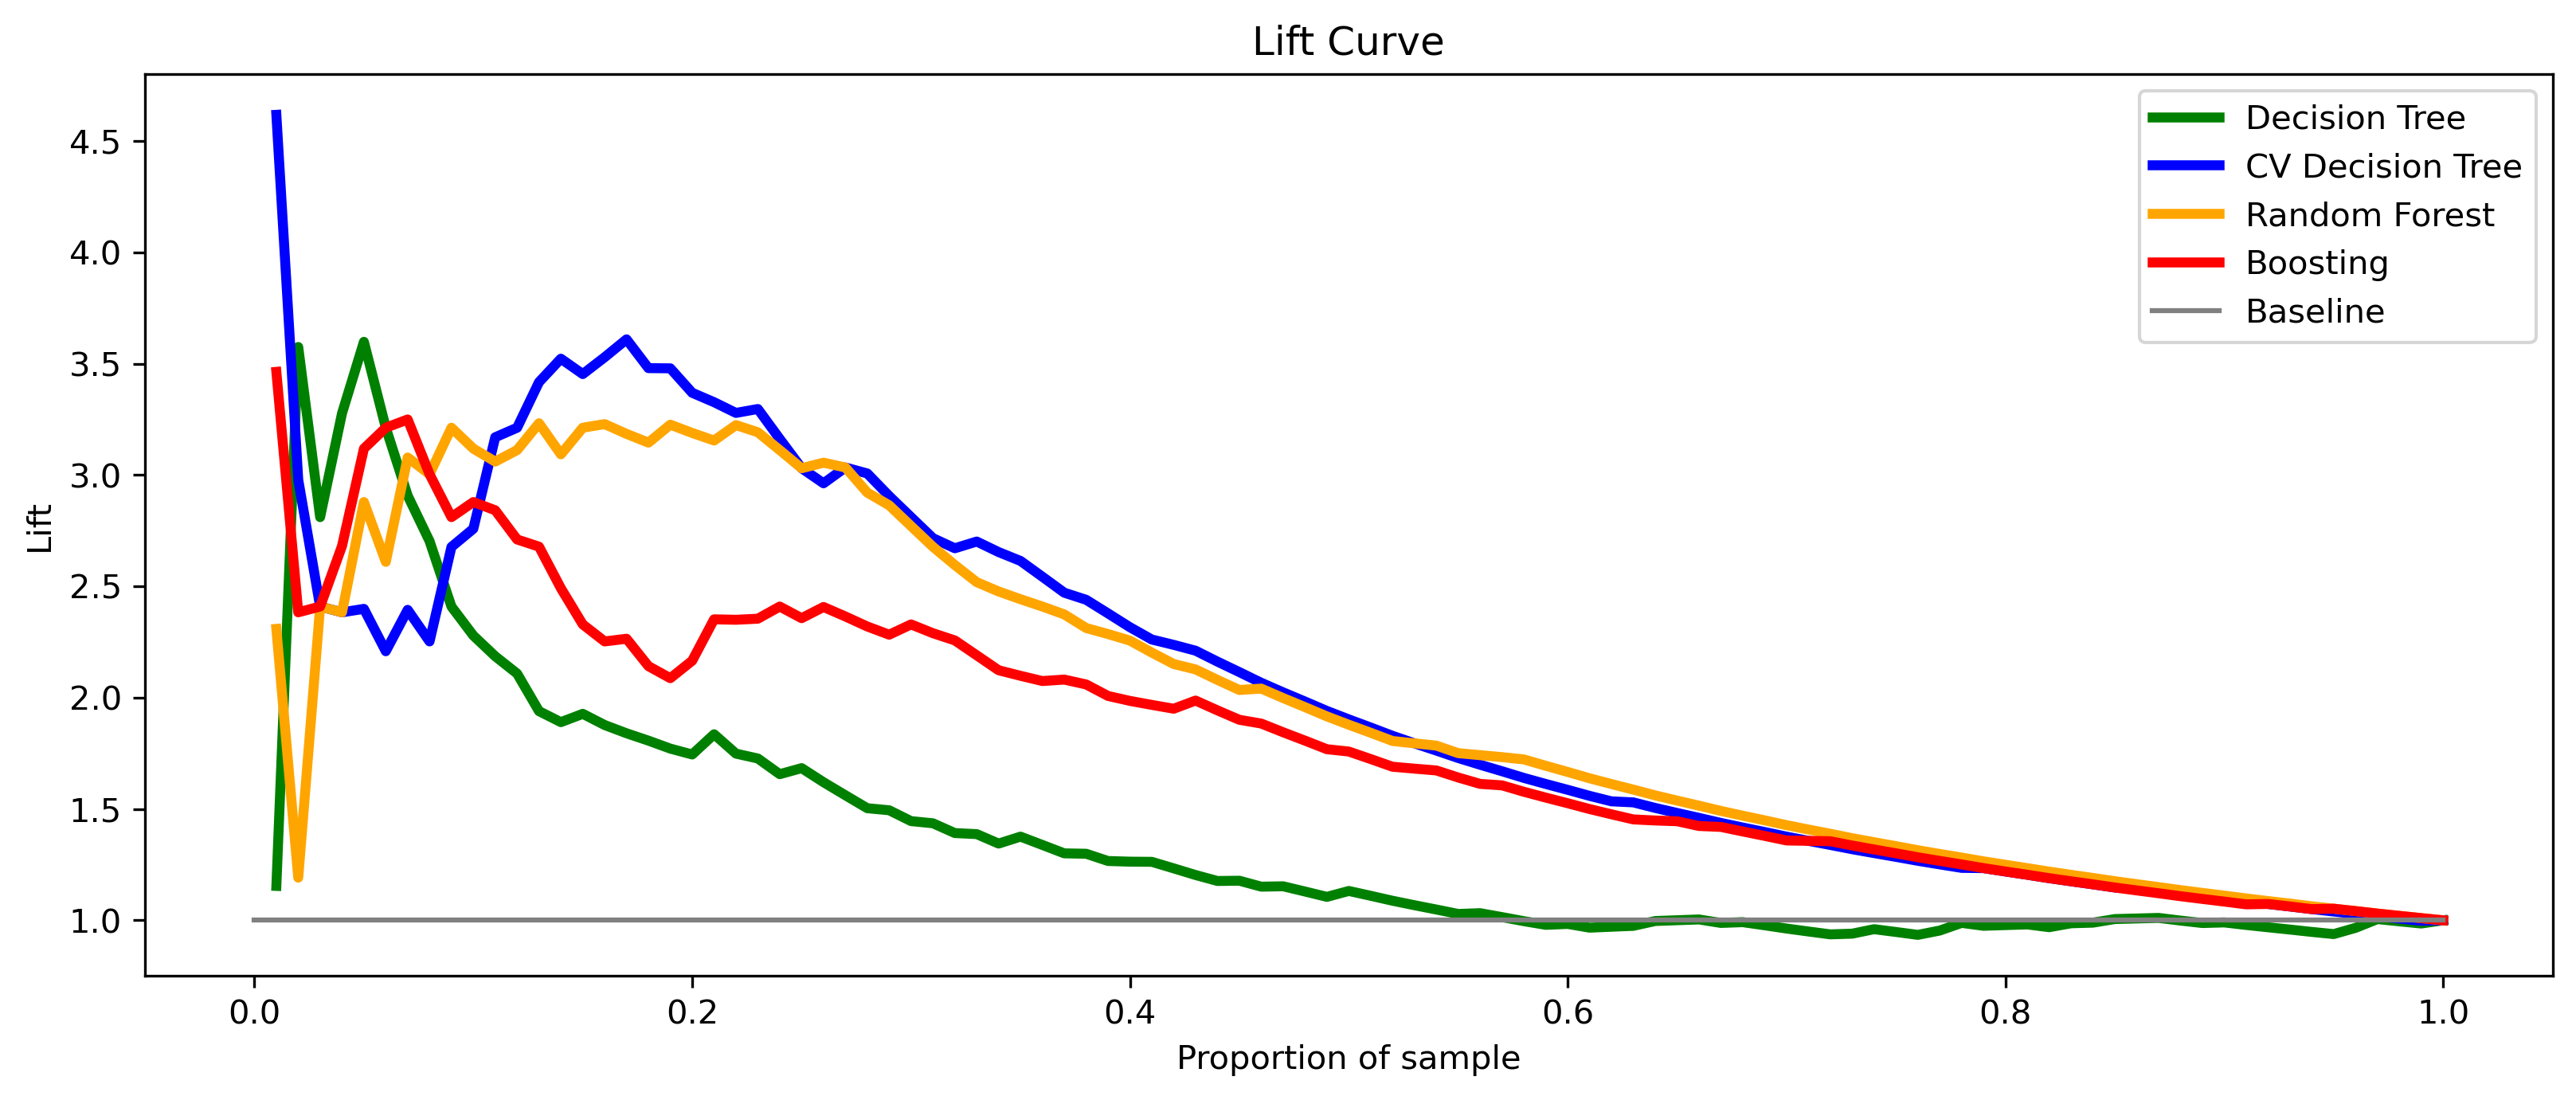

In [214]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (13,5), dpi=300)
ax.plot(lift_Tree["ProportionSample"],lift_Tree["Lift"], color='green', linewidth = 3, label = "Decision Tree")
ax.plot(lift_Tree_CV["ProportionSample"],lift_Tree_CV["Lift"], color='blue', linewidth = 3, label = "CV Decision Tree")
ax.plot(lift_Forest_CV["ProportionSample"],lift_Forest_CV["Lift"], color='orange', linewidth = 3, label = "Random Forest")
ax.plot(lift_Boost_CV["ProportionSample"], lift_Boost_CV["Lift"], color="red", linewidth = 3, label = "Boosting")
ax.plot([0,1],[1,1],color="grey", label="Baseline")
ax.set_xlabel('Proportion of sample')
ax.set_ylabel('Lift')
ax.set_title('Lift Curve')
ax.legend()
plt.show()

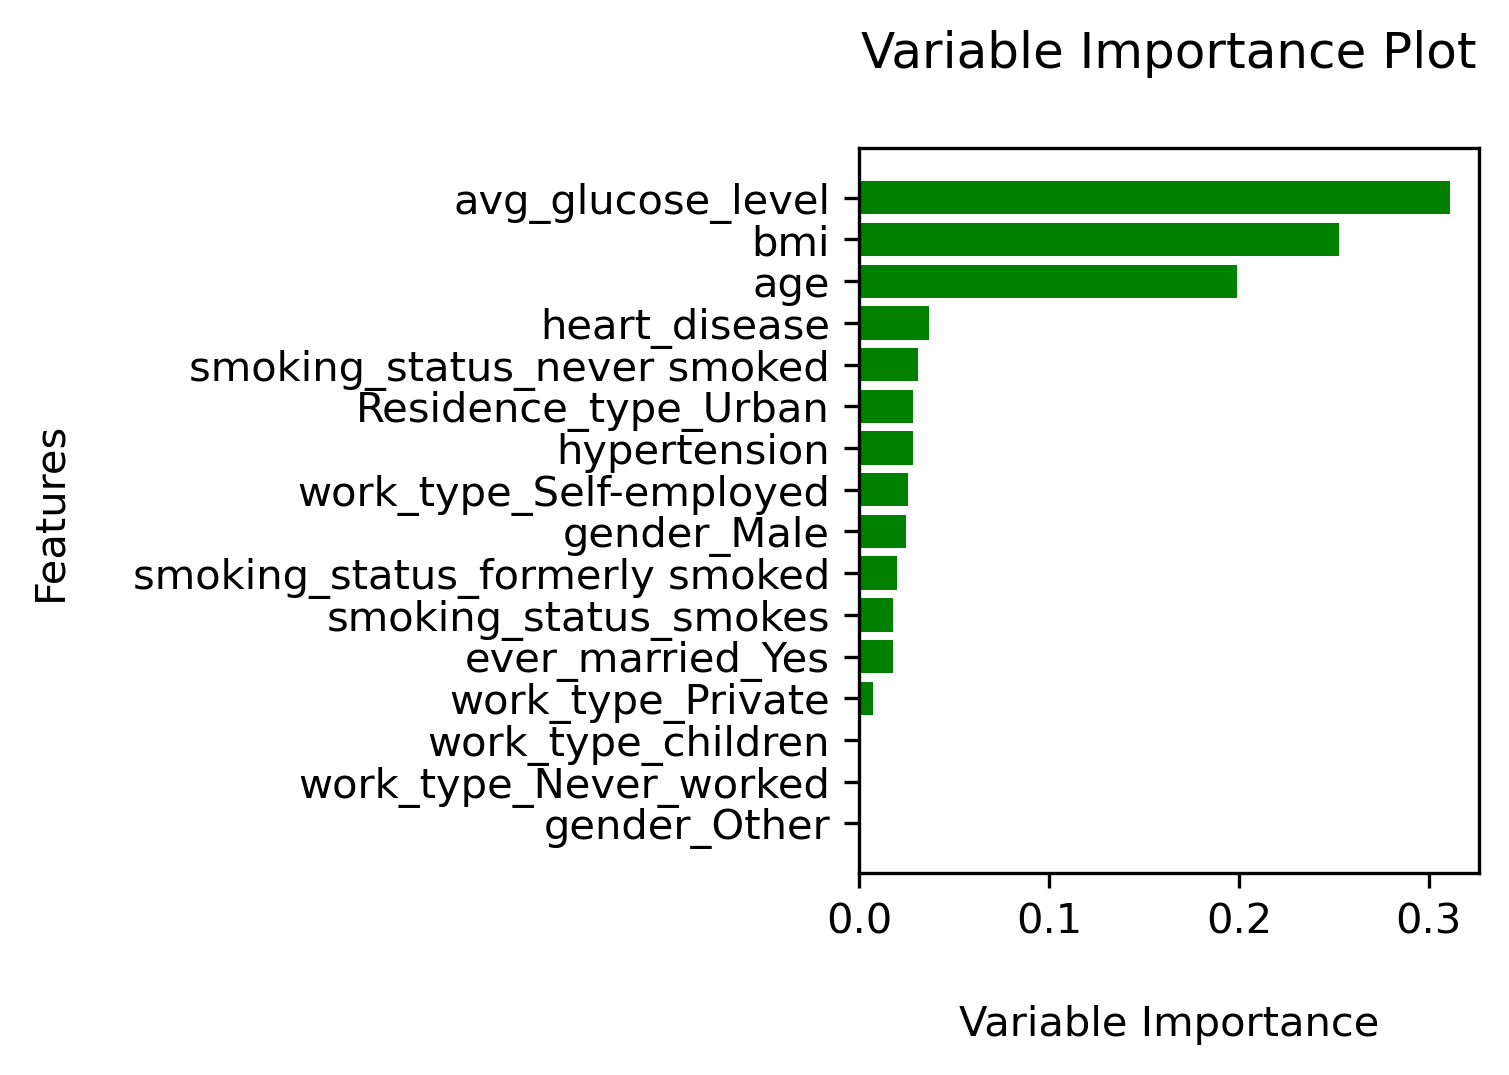

In [216]:
def plot_variable_importance(model, X_train):
    import matplotlib.pyplot as plt
    from pandas import DataFrame
    imp=DataFrame({"imp":model.feature_importances_, "names":X_train.columns}).sort_values("imp", ascending=True)
    fig, ax = plt.subplots(figsize=(imp.shape[0]/6,imp.shape[0]/5), dpi=300) 
    ax.barh(imp["names"],imp["imp"], color="green") 
    ax.set_xlabel('\nVariable Importance')
    ax.set_ylabel('Features\n') 
    ax.set_title('Variable Importance Plot\n') 
    plt.show() 

    
plot_variable_importance(Tree, X_train)